
<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='15'><b> Pandas DataFrame - Series </b></font> <br><font color='#FC7307' size=6>Student Copy</font></p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'></h4>

---


> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

<h2> References </h2>

* Pandas Reference Guide https://pandas.pydata.org/pandas-docs/stable/

# <a name="toc-7"></a> Table of contents 

1. [Introducting Pandas Objects](#intro)
2. [Reading and Viewing Data](#readview)
3. [Data Indexing and Selection](#selection)
4. [Basic Operations](#operations)

<br>
    
# <a name="intro"></a><font color='#347B98'> 1 - Fundamental Pandas Data Structures: Series, DataFrame, and Index </font> <font size='3'>[Back to TOC](#toc-7)</font>


At the very basic level, `Pandas objects` can be thought of as `enhanced versions of Numpy structured arrays` in which the rows and columns are identified with **`labels`** rather than simple integer indices. Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are. Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the **`Series`**, **`DataFrame`**, and **`Index`**.

In [1]:
import pandas as pd
import numpy as np

## $\Delta$ 1.1 - Pandas Series Object

A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [2]:
l = [0.25, 0.5, 0.75, 1.0]

In [3]:
type(l)

list

In [4]:
l[1]

0.5

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [9]:
type(data)

pandas.core.series.Series

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

As we see in the output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array:

In [12]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [13]:
s.index

RangeIndex(start=0, stop=6, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [14]:
s[2]

5.0

In [15]:
s[1:3]

1    3.0
2    5.0
dtype: float64

### Series as NumPy array

The essential difference between a Series and Numpy Array is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [16]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [17]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [18]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [19]:
data['a']

0.25

We can even use non-contiguous or non-sequential indices:


In [20]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as Specialized Dictionary

We can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

In [21]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [22]:
population.values

array([38332521, 19552860, 12882135, 19651127, 26448193])

In [23]:
population.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [24]:
population['Florida']

19552860

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [23]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series Object

> pd.Series(data, index=index)

In [27]:
# For example, data can be a list or NumPy array, in which case index defaults to an integer sequence
pd.Series([2, 4, 6])


0    2
1    4
2    6
dtype: int64

In [28]:
# data can be a scalar, which is repeated to fill the specified index
pd.Series(5, index=[100, 200, 300])


100    5
200    5
300    5
dtype: int64

In [29]:
pd.Series({2:'a', 1:'b', 3:'c', 4:'d'}, index=[4, 3, 2])

4    d
3    c
2    a
dtype: object

### $\Delta$ Exercise 1.1 Creating Series

Question: 

Create a Series from a dictionary that has integer 0 to 19 as index and random number between range [0, 1]. You should expect output like this


**values**  
`[ 0.98000537  0.53676033  0.34231615  0.28810771  0.44019861  0.47648493  
  0.92837637  0.94332922  0.80151369  0.19528723  0.35994866  0.91016936  
  0.01509227  0.42555103  0.92382457  0.28921169  0.91818309  0.79261148  
  0.16085329  0.41213327]  `
  
**index**   
`Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')`

In [28]:
import random

# random.random()

###################
# Your code below
###################





[0.54422923 0.36995517 0.60392004 0.6257203  0.06552886 0.01316799
 0.83746908 0.25935401 0.23433096 0.99564484 0.47026351 0.83646145
 0.47635321 0.63906814 0.15061642 0.63486066 0.86804531 0.52318121
 0.74125186 0.67141148]
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')


## $\Delta$ 1.2 - Pandas DataFrame Object

### DataFrame as a numpy array

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

#### Create two series 

> the two series will be put into a dataframe later as two columns

In [30]:
# create the population series from a dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [31]:
# create the area series from a dict
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

#### Use a dictionary to create a two-dimensional object 

In [32]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [33]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Like the Series object, the DataFrame has an **`index`** attribute that gives access to the index labels as well as a **`columns`** attribute

In [34]:
print(states.index)
print(states.columns)

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')
Index(['area', 'population'], dtype='object')


Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [35]:
type(states['area'])

pandas.core.series.Series

In [36]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Constructing DataFrame objects¶
A Pandas DataFrame can be constructed in a variety of ways. Here we'll give several examples.

#### $\Omega$ Constructing DataFrame from a dictionary of Series objects
As we saw before, a DataFrame can be constructed from a dictionary of Series objects as well:

In [37]:
# create the population series 
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

# create the population series 
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

# create the dataframe from a dict of series
states = pd.DataFrame({'population': population,
                       'area': area})

states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### $\Omega$ Constructing DataFrame from a 2-d numpy array with index and columns

Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:

In [38]:
np.random.rand(3, 2)

array([[0.92453317, 0.34956281],
       [0.68658765, 0.96386468],
       [0.44042262, 0.8508264 ]])

In [39]:
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [40]:
df.columns

Index(['foo', 'bar'], dtype='object')

#### $\Omega$ Constructing DataFrame from a NumPy structured array
A Pandas DataFrame operates much like a structured array, and can be created directly from one:

In [41]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


#### $\Omega$ Constructing DataFrame from a list of dicts
Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data:

In [42]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


### $\Delta$ Exercise 1.2 Creating DataFrames

`Question`: Create a dataframe from 2-d numpy array. Index will be dates from 2013-01-01 to 2013-01-06 and column names will be ['A', 'B', 'C', 'D'] and fill the dataframe with random number as values
    
`Expected output`  

<img src='https://s3.amazonaws.com/weclouddata/images/python/pandas_df_q1.png' width='30%'>



#### Lab 1.2 - Questions: Create a dataframe from 2-d numpy array


In [45]:
### Solution 2 - Using pandas.date_range

###########################
##   Your Code Below
###########################





,A,B,C,D
2013-01-01,-1.401020,-0.149466,0.560561,-2.377506
2013-01-02,0.820979,0.768539,-0.862817,-1.089616
2013-01-03,-1.478439,-0.649918,2.292268,1.001533
2013-01-04,-0.562325,-0.310537,-1.003823,-0.115784
2013-01-05,-0.137345,-0.893489,0.218540,-0.125707
2013-01-06,0.215296,1.840011,-0.498671,-0.076776


##  $\Delta$ 1.3 Pandas Index Object

We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an **`immutable array`** or as an **`ordered set`** (technically a multi-set, as Index objects may contain repeated values). Those views have some interesting consequences in the operations available on Index objects. As a simple example, let's construct an Index from a list of integers:

In [46]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as an immutable array

The Index in many ways operates like an array. For example, we can use standard Python indexing notation to retrieve values or slices:

In [47]:
print(ind[1])
print(ind[::2])
print(ind.size, ind.shape, ind.ndim, ind.dtype)


3
Int64Index([2, 5, 11], dtype='int64')
5 (5,) 1 int64


However, if you want to modify an index, you will get errors. One difference between Index objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [36]:
ind[1] = 0

TypeError: Index does not support mutable operations

---
<br>
    
# <a name="readview"></a><font color='#347B98'> 2 - Reading and Viewing Data </font> <font size='3'>[Back to TOC](#toc-7)</font>

    
Pandas can read data from many different sources such as csv file, relational databases, data APIs etc. In this lecture, we will teach students how to work with csv files.

## $\Delta$ 2.1 - Reading data from `csv` files

> `pd.read_csv(filepath, sep=',', encoding=None, index_col=None)  `

To get help on pd.read_csv(), refer to https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

### Read csv without specifying a separator

It's always a good habit to check out the separator in the raw data. Without providing a separator in the read_csv funtion, the entire line gets read into one column

In [49]:
broken_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bikes.csv')
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


### Properly set the separator and encoding method

In [52]:
### read data with delimiters and char encoding
fixed_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bikes.csv', 
                       sep=';', 
                       encoding='latin1')
fixed_df.head(3)

,Date,Berri 1,Brï¿½beuf (donnï¿½es non disponibles),Cï¿½te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnï¿½es non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [53]:
fixed_df.index

RangeIndex(start=0, stop=310, step=1)

### Set the Date column to be index

In [54]:
fixed_df.set_index(['Date'], inplace=True)

In [55]:
fixed_df.head(3)

,Berri 1,Brï¿½beuf (donnï¿½es non disponibles),Cï¿½te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnï¿½es non disponibles)
Date,,,,,,,,,
01/01/2012,35,NaN,0,38,51,26,10,16,NaN
02/01/2012,83,NaN,1,68,153,53,6,43,NaN
03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [56]:
fixed_df.index

Index(['01/01/2012', '02/01/2012', '03/01/2012', '04/01/2012', '05/01/2012',
       '06/01/2012', '07/01/2012', '08/01/2012', '09/01/2012', '10/01/2012',
       ...
       '27/10/2012', '28/10/2012', '29/10/2012', '30/10/2012', '31/10/2012',
       '01/11/2012', '02/11/2012', '03/11/2012', '04/11/2012', '05/11/2012'],
      dtype='object', name='Date', length=310)

> Note that the index object has changed

### Visualize the data using plot()

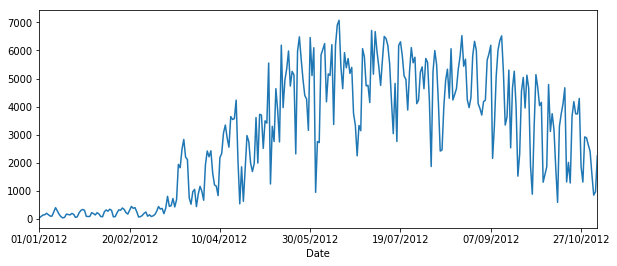

In [58]:
# Plot the "Berri 1' column
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

fixed_df['Berri 1'].plot()

#### Plot all the columns

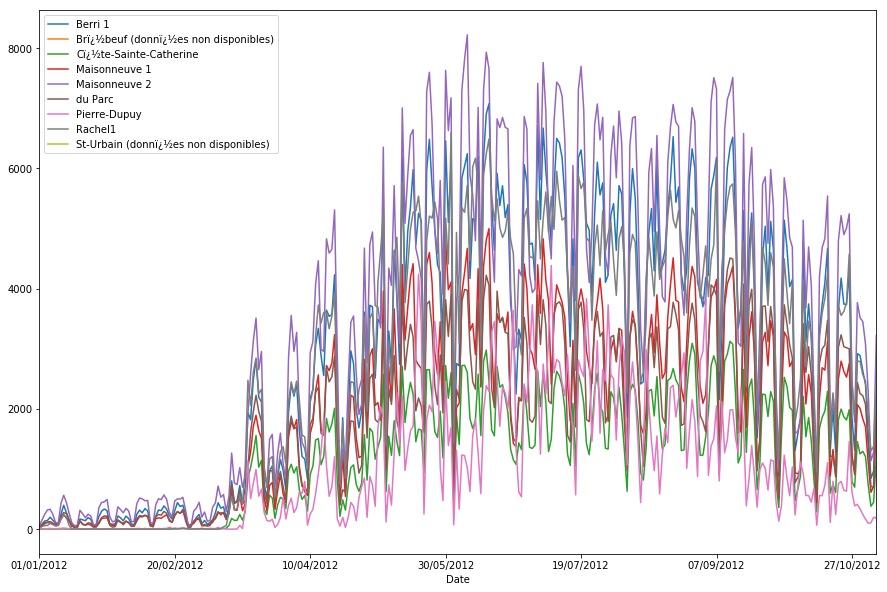

In [59]:
fixed_df.plot(figsize=(15, 10))

### $\Delta$ Exercise 2.1 - Read apple stock data into a DataFrame and plot the price over time

Question: 
1. Read the "https://s3.amazonaws.com/weclouddata/datasets/random/AAPL.csv" file into a dataframe 
2. Set date column as index
3. Sort the dataframe by date index
4. Plot the 'Adj Close' price trend over time

#### Read stock data

In [60]:
# Your Code Here



,Date,Open,High,Low,Close,Volume,Adj Close
4433,1996-01-15,33.75,34.50,33.38,34.13,12971200,8.30
4434,1996-01-12,34.75,34.75,33.25,33.88,14370000,8.24
4435,1996-01-11,32.63,35.00,32.38,35.00,27041200,8.51
4436,1996-01-10,32.50,34.75,32.25,34.25,13057600,8.33
4437,1996-01-09,34.63,34.63,32.75,32.75,8978800,7.96
4438,1996-01-08,34.50,35.50,34.00,34.63,4341200,8.42
4439,1996-01-05,31.62,34.25,31.37,34.25,15929200,8.33
4440,1996-01-04,32.38,32.38,31.37,31.56,10721200,7.67
4441,1996-01-03,32.00,32.88,31.87,32.13,15368800,7.81
4442,1996-01-02,32.25,32.25,31.75,32.13,4983200,7.81


#### Set 'Date' column as index

In [61]:
# Your Code Here

stock.set_index(['Date'], inplace=True)
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-08-23,503.27,503.35,499.35,501.02,7877000,501.02
2013-08-22,504.98,505.59,498.20,502.96,8721700,502.96
2013-08-21,503.59,507.15,501.20,502.36,11995700,502.36
2013-08-20,509.71,510.57,500.82,501.07,12810300,501.07
2013-08-19,504.34,513.74,504.00,507.74,18232800,507.74


#### Sort the dataframe by date index

In [62]:
# Your Code Here

stock.sort_index(inplace=True)
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1996-01-02,32.25,32.25,31.75,32.13,4983200,7.81
1996-01-03,32.00,32.88,31.87,32.13,15368800,7.81
1996-01-04,32.38,32.38,31.37,31.56,10721200,7.67
1996-01-05,31.62,34.25,31.37,34.25,15929200,8.33
1996-01-08,34.50,35.50,34.00,34.63,4341200,8.42


#### Plot the trend for 'Adj Close' price

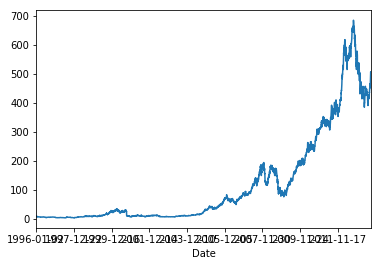

In [63]:
%matplotlib inline
# Your Code Here

stock['Adj Close'].plot()

## $\Delta$ 2.2 - Exploring DataFrames  

### Load the 311 servicde requests data

In [65]:
complaints = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/311-service-requests.csv.txt', dtype={'Incident Zip': object})
complaints.set_index('Unique Key', inplace=True)

In [66]:
complaints.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


### Viewing the first few rows

In [67]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111069 entries, 26589651 to 26428033
Data columns (total 51 columns):
Created Date                      111069 non-null object
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non-null object
City                              

In [68]:
complaints.head(10)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"


### Viewing the last few rows

In [69]:
complaints.tail(5)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


### Print the index, columns and values

#### Extract the index

In [70]:
complaints.index

Int64Index([26589651, 26593698, 26594139, 26595721, 26590930, 26592370,
            26595682, 26595195, 26590540, 26594392,
            ...
            26429040, 26434084, 26426164, 26439710, 26435569, 26426013,
            26428083, 26428987, 26426115, 26428033],
           dtype='int64', name='Unique Key', length=111069)

#### Extract the column names into a list or index

In [71]:
complaints.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Lati

#### Extract the values into numpy arrays

In [72]:
complaints.values

array([['10/31/2013 02:08:41 AM', nan, 'NYPD', ..., 40.70827532593202,
        -73.79160395779721, '(40.70827532593202, -73.79160395779721)'],
       ['10/31/2013 02:01:04 AM', nan, 'NYPD', ..., 40.72104053562831,
        -73.90945306791765, '(40.721040535628305, -73.90945306791765)'],
       ['10/31/2013 02:00:24 AM', '10/31/2013 02:40:32 AM', 'NYPD', ...,
        40.843329754665135, -73.93914371913482,
        '(40.84332975466513, -73.93914371913482)'],
       ...,
       ['10/04/2013 12:00:45 AM', '10/04/2013 01:25:01 AM', 'NYPD', ...,
        40.7402953546437, -73.97695165980414,
        '(40.740295354643706, -73.97695165980414)'],
       ['10/04/2013 12:00:28 AM', '10/04/2013 04:17:32 AM', 'NYPD', ...,
        40.640181746624854, -73.95530566958138,
        '(40.64018174662485, -73.95530566958138)'],
       ['10/04/2013 12:00:10 AM', '10/04/2013 01:20:52 AM', 'NYPD', ...,
        40.64002405739922, -73.90071711703162,
        '(40.640024057399216, -73.90071711703163)']], dtype=obj

### Print column data types

In [73]:
complaints.dtypes

Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                            object
X Coordinate (State Plane)        

### `describe()` shows a quick statistic summary of your numeric data

In [74]:
complaints.describe()

,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


### Get value counts of a column

In [75]:
complaints['Complaint Type'].value_counts()[:20]

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
ELECTRIC                     2350
Broken Muni Meter            2070
Noise - Street/Sidewalk      1928
Sanitation Condition         1824
Rodent                       1632
Name: Complaint Type, dtype: int64

### Sort a DataFrame by Index

In [76]:
complaints.head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


In [77]:
complaints.sort_index(ascending=False).head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26596133,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,10458,2464 BEAUMONT AVENUE,BEAUMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855767,-73.883492,"(40.85576714974678, -73.88349179637943)"
26596132,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11210,2501 NOSTRAND AVENUE,NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623528,-73.946250,"(40.62352798084708, -73.94624978072031)"
26596131,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10475,3403 BOLLER AVENUE,BOLLER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.880235,-73.835035,"(40.88023467959374, -73.8350347892652)"


### Sort a DataFrame by columns

In [78]:
complaints.sort_values(by=['Created Date'], ascending=True).head(5)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26439731,10/04/2013 01:00:00 PM,10/05/2013 12:00:00 PM,DSNY,BCC - Brooklyn North,Overflowing Litter Baskets,6 Overflowing Litter Baskets,Sidewalk,11210,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.633997,-73.947773,"(40.63399731095844, -73.94777257477888)"
26434977,10/04/2013 01:00:00 PM,NaN,DSNY,A - Brooklyn,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11231,71 SULLIVAN STREET,SULLIVAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677343,-74.011558,"(40.677343195035135, -74.01155835711819)"
26439288,10/04/2013 01:00:00 PM,NaN,DEP,Department of Environmental Protection,Air Quality,Air: Other Air Problem (Use Comments) (AZZ),NaN,10034,250 DYCKMAN STREET,DYCKMAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866415,-73.928338,"(40.8664147310484, -73.92833762223987)"
26429914,10/04/2013 01:00:50 AM,10/04/2013 02:53:49 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11377,50-31 NEWTOWN ROAD,NEWTOWN ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.753960,-73.911170,"(40.75395970652276, -73.91116969635213)"
26435106,10/04/2013 01:00:51 PM,10/04/2013 08:31:54 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10456,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829824,-73.907722,"(40.8298241274209, -73.90772232109839)"


#### Sort by multiple columns

In [79]:
complaints.sort_values(by=['Location Type','Created Date'], ascending=[True, False]).head(5)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26590905,10/30/2013 12:10:39 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11103,33-10 24 AVENUE,24 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771438,-73.914204,"(40.771437791236906, -73.91420432590131)"
26595845,10/30/2013 12:07:21 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,1-2 Family Dwelling,11418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693727,-73.844703,"(40.69372683792426, -73.84470267561183)"
26582534,10/30/2013 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10304,118 SEAVIEW AVENUE,SEAVIEW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589258,-74.097501,"(40.58925785461915, -74.09750078255374)"
26591881,10/30/2013 11:03:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Asbestos,NaN,1-2 Family Dwelling,10460,1831 WATERLOO PLACE,WATERLOO PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840480,-73.887519,"(40.84048038252795, -73.88751934468769)"
26590698,10/30/2013 10:24:32 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10026,321 WEST 116 STREET,WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.804697,-73.956004,"(40.804697298436864, -73.95600431980877)"


### $\Delta$ Exercise 2.2 Exploring the Twitter Dataset

Data

* [https://s3.amazonaws.com/weclouddata/datasets/random/tweets.txt](https://s3.amazonaws.com/weclouddata/datasets/random/tweets.txt)

Data Description:

* The twitter dataset has about 300k tweets
* List of columns:
    * id
    * timestamp (ts)
    * coordinate
    * lat
    * long
    * tweet (text)
    
Questions:

* Load the twitter dataset into a dataframe
* Explore the first 10 rows
* Print a list of all columns
* Get value counts by date (NOT datetime) - number of tweets by day
* Sort the tweet data by time

#### Exercise 2.2 - 1. Load twitter data into dataframe

In [80]:
### Your Code Below






#### Exercise 2.2 - 2. Print the first 10 rows and explore data

In [81]:
### Your Code Below




,id,ts,coordinate,lat,long,tweet
0,USER_6197f95d,2010-03-03T02:02:04,"ÃT: 40.2015,-74.806535",40.201500,-74.806535,Watching LOST
1,USER_6197f95d,2010-03-03T12:01:41,"ÃT: 40.221968,-74.734795",40.221968,-74.734795,@USER_89a3500b i did
2,USER_6197f95d,2010-03-03T20:06:19,"ÃT: 40.221968,-74.734795",40.221968,-74.734795,"Maneuver so that I can put my team on, hopeful..."
3,USER_6197f95d,2010-03-03T23:30:45,"ÃT: 40.221333,-74.732688",40.221333,-74.732688,Darko was eating hamburgers in the locker room...
4,USER_6197f95d,2010-03-04T02:58:43,"ÃT: 40.220681,-74.758761",40.220681,-74.758761,Girl pack ya bags i'm bout to take you on a ride!
5,USER_6197f95d,2010-03-04T15:26:50,"ÃT: 40.194523,-74.756427",40.194523,-74.756427,"@USER_a9cf8f82 lol, yeah check it out bro"
6,USER_6197f95d,2010-03-04T20:03:07,"ÃT: 40.289891,-74.678256",40.289891,-74.678256,RT @USER_5eae722d: #inhighschool me & Mr. Stav...
7,USER_6197f95d,2010-03-04T23:57:58,"ÃT: 40.221968,-74.734795",40.221968,-74.734795,#inhighschool trenton high girls basketball te...
8,USER_6197f95d,2010-03-05T00:17:13,"ÃT: 40.221968,-74.734795",40.221968,-74.734795,The cheerleading team need Mrs. Grady back
9,USER_6197f95d,2010-03-05T00:39:56,"ÃT: 40.221968,-74.734795",40.221968,-74.734795,This girl Ashley Hines from is a beast. They c...


#### Exercise 2.2 - 3. Print column names

In [82]:
### Your Code Below




Index(['id', 'ts', 'coordinate', 'lat', 'long', 'tweet'], dtype='object')

#### Exercise 2.2 - 4. Get value counts by date (NOT datetime) - number of tweets by day

In [83]:
### Your Code Below




array(['2010-03-03T02:02:04', '2010-03-03T12:01:41',
       '2010-03-03T20:06:19', ..., '2010-03-06T19:03:48',
       '2010-03-06T19:19:05', '2010-03-07T05:50:25'], dtype=object)

#### Exercise 2.2 - 5. Sort the tweet data by time

In [ ]:
### Your Code Below





---
# <a name="selection"></a><font color='#347B98'> 3. Data Indexing and Selection </font> <font size='3'>[Back to TOC](#toc-7)</font>

The corresponding patterns in Pandas will feel very familiar to numpy, though there are a few quirks to be aware of.
We'll start with the simple case of the one-dimensional Series object, and then move on to the more complicated two-dimesnional DataFrame object.

## $\Delta$ 3.1 Data Selection in Series
As we saw in the previous section, a Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values:

In [84]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [85]:
data['b']


0.5

In [86]:
'a' in data


True

In [87]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [88]:
data.index == data.keys()

array([ True,  True,  True,  True])

In [89]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

### Series as array

A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, slices, masking, and fancy indexing. Examples of these are as follows:

#### slicing by explicit index

In [90]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

#### slicing by implicit integer index


In [91]:
data[0:2]

a    0.25
b    0.50
dtype: float64

#### masking


In [92]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

#### fancy indexing

In [97]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [98]:
data[['a', 'e']]

a    0.25
e     NaN
dtype: float64

## $\Delta$ 3.2 Data Selection in DataFrame

Pandas support several ways to access and select data in a DataFrame. Commonly used methods are:
`
* Selection by index (dictionary-style)
* Selection by label (array-style via loc)
* Selection by position (array-style via iloc)

In [99]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


### 3.2.1 - Selection by Index (DataFrame as dictionary)

#### Secting a single column, which yields a `Series`, equivalent to `df.A`

In [100]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [101]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [102]:
type(data['area'])

pandas.core.series.Series

In [103]:
data['area'] == data.area

California    True
Florida       True
Illinois      True
New York      True
Texas         True
Name: area, dtype: bool

#### Selecting multiple columns

In [104]:
data[['area', 'pop']]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### Turning a column series back to a dataframe

In [105]:
pd.DataFrame(data['area'], columns=['area'])

,area
California,423967
Florida,170312
Illinois,149995
New York,141297
Texas,695662


#### Adding a new column to a dataframe

In [106]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Slicing the rows by row index (explicit)

In [107]:
data['California': 'Illinois']

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Slicing the rows by row index (implicit)

In [108]:
data[0:3]

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [109]:
data[0:3] == data['California': 'Illinois'] 

,area,pop,density
California,True,True,True
Florida,True,True,True
Illinois,True,True,True


#### Slicing both rows and columns using dictionary style

In [110]:
data['density'][2:5]

Illinois     85.883763
New York    139.076746
Texas        38.018740
Name: density, dtype: float64

In [111]:
data[2:5]['density']

Illinois     85.883763
New York    139.076746
Texas        38.018740
Name: density, dtype: float64

### 3.2.2 - Selection by Label (array-style)


As mentioned previously, we can also view the DataFrame as an enhanced two-dimensional array. We can examine the raw underlying data array using the values attribute:

In [112]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

With this picture in mind, many familiar array-like observations can be done on the DataFrame itself. For example, we can transpose the full DataFrame to swap rows and columns:

In [113]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


Thus for array-style indexing, we need another convention. Here Pandas again uses the loc, iloc, and ix indexers mentioned earlier. Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result:

> **`loc`** works on labels in the index.  
> **`iloc`** works on the positions in the index (so it only takes integers).  

#### Slicing rows and columns with `loc`

In [114]:
data.loc['Illinois':'New York', 'pop':'density']

,pop,density
Illinois,12882135,85.883763
New York,19651127,139.076746


#### Selecting multiple columns with row slicing

In [115]:
data.loc['Illinois':'New York', ['area', 'density']]

,area,density
Illinois,149995,85.883763
New York,141297,139.076746


#### Row filtering
Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing as in the following:

In [116]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [118]:
data.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [122]:
# Find all rows with index name ending `a`
data.loc[data.index.isin([x for x in data.index if x.endswith('a')])]

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121


### 3.2.3 - Selection by Position (array-style)


#### Select rows by position

In [123]:
data.iloc[3]

area       1.412970e+05
pop        1.965113e+07
density    1.390767e+02
Name: New York, dtype: float64

In [124]:
data.iloc[2:5]

,area,pop,density
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Slicing both rows and columns with `iloc`

In [125]:
data.iloc[2:4, :2]

,area,pop
Illinois,149995,12882135
New York,141297,19651127


In [126]:
data.iloc[1:3, :]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Fancy indexing

In [127]:
data.iloc[[1,2,4],[0,2]]

,area,density
Florida,170312,114.806121
Illinois,149995,85.883763
Texas,695662,38.018740


### 3.2.4 - Boolean Indexing and Row Filtering

In [128]:
data['density'] > 90

California     True
Florida        True
Illinois      False
New York       True
Texas         False
Name: density, dtype: bool

In [129]:
data[data['density'] > 90]

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


In [134]:
data[data.area == 170312]

,area,pop,density
Florida,170312,19552860,114.806121


#### Filtering on multiple columns

In [135]:
pop_f = data['pop']>15000000
density_f = data['density']>95

In [136]:
data[pop_f & density_f]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


### $\Delta$ Lab - Data Selection and Indexing

Questions:

1. Get 10 most common complaint type from 311 complaint dataset
2. Select complaint type in the first 5 rows - dictionary style
3. Select Complaint Type and Descriptor columns for case "26595721" (unique key)
4. What is the most common 'Location Type' for complaints about 'Rodent'?
5. Select NY boroughs with most noise complaints?
6. Normalize the 'borough' noise complaint count in NY 'Borough' by the total noise counts in each borough and plot on a bar chart
7. Select all rows with 'Noise - Street/Sidewalk' complaint type in borough 'BROOKLYN' 



In [137]:
complaints = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/311-service-requests.csv.txt', dtype={'Incident Zip': object})
complaints.set_index('Unique Key', inplace=True)

#### Select "Complaint Type" and get 10 most common complaint types

In [7]:
# Your Code Here




#### Select complaint type in the first 5 rows

In [6]:
# Your Code Here




#### Select Complaint Type and Descriptor columns for case "26595721" (unique key)

In [5]:
# Your Code Here




#### What is the most common 'Location Type' for complaints about 'Rodent'?

In [4]:
# Your Code Here





#### Select NY boroughs with most noise complaints?


In [3]:
# Your Code Here





#### Normalize the 'borough' noise complaint count in NY 'Borough' by the total noise counts in each borough and plot on a bar chart

In [1]:
# Your Code Here






#### Select all rows with 'Noise - Street/Sidewalk' complaint type in borough 'BROOKLYN'

In [2]:
# Your Code Here






<br>
    
# <a name="readview"></a><font color='#347B98'> 4. Basic Operations </font> <font size='3'>[Back to TOC](#toc-7)</font>


## 4.1 - Simple Statistics

### Cardinality

In [149]:
complaint_counts = complaints['Complaint Type'].value_counts()
print(complaint_counts[:20])

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
ELECTRIC                     2350
Broken Muni Meter            2070
Noise - Street/Sidewalk      1928
Sanitation Condition         1824
Rodent                       1632
Name: Complaint Type, dtype: int64


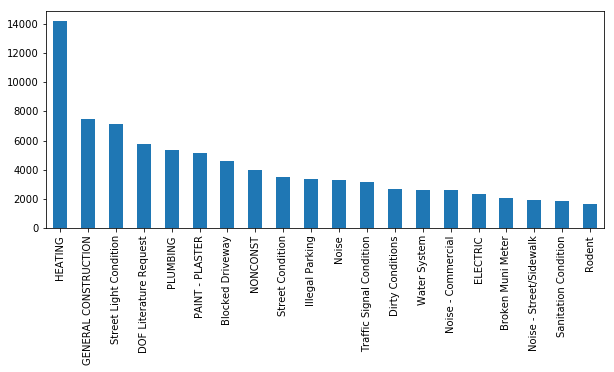

In [433]:
complaint_counts[:20].plot(kind='bar')


### Mean/Average

In [150]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.169695,2.265573,-0.812961,0.565318
2013-01-02,0.304135,-0.698366,-1.151167,1.490980
2013-01-03,-1.525203,1.018367,-0.446764,-0.057494
2013-01-04,-0.599551,0.341267,0.488705,1.168675
2013-01-05,0.682076,0.078750,0.693163,0.871816
2013-01-06,-0.657784,-0.472212,-1.093884,1.021593


In [151]:
df.mean(axis=1)

2013-01-01    0.212059
2013-01-02   -0.013605
2013-01-03   -0.252773
2013-01-04    0.349774
2013-01-05    0.581451
2013-01-06   -0.300572
Freq: D, dtype: float64

In [436]:
df.mean(axis=0)

A    0.278865
B   -0.011031
C   -0.448938
D   -0.736911
dtype: float64

## 4.2 Applying functions to DF columns

#### Calculate cumulative sum for each column

In [152]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.718375,-0.061648,-2.425300,-0.275138
2013-01-02,2.752934,0.399659,1.274132,0.078175
2013-01-03,1.570638,-1.396662,-1.240024,0.444549
2013-01-04,-0.336259,0.104419,1.381211,-0.736300
2013-01-05,-0.151852,-1.185495,-0.141304,0.056376
2013-01-06,-1.340307,-0.578910,0.271106,-1.204198


In [154]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.718375,-0.061648,-2.425300,-0.275138
2013-01-02,3.471308,0.338011,-1.151169,-0.196964
2013-01-03,5.041947,-1.058651,-2.391193,0.247585
2013-01-04,4.705688,-0.954232,-1.009982,-0.488715
2013-01-05,4.553836,-2.139727,-1.151286,-0.432339
2013-01-06,3.213529,-2.718637,-0.880181,-1.636537


#### Calculate value range for each column

In [155]:
df.apply(lambda x: x.max() - x.min())

A    4.093241
B    1.796321
C    3.806511
D    1.648747
dtype: float64

#### Standardize all complaint type to first letter uppercase

In [156]:
complaints['Complaint Type'].value_counts()[:20]

# we notice that some types are all uppercase

HEATING                     14200
GENERAL CONSTRUCTION         7471
Street Light Condition       7117
DOF Literature Request       5797
PLUMBING                     5373
PAINT - PLASTER              5149
Blocked Driveway             4590
NONCONST                     3998
Street Condition             3473
Illegal Parking              3343
Noise                        3321
Traffic Signal Condition     3145
Dirty Conditions             2653
Water System                 2636
Noise - Commercial           2578
ELECTRIC                     2350
Broken Muni Meter            2070
Noise - Street/Sidewalk      1928
Sanitation Condition         1824
Rodent                       1632
Name: Complaint Type, dtype: int64

In [157]:
# change to first letter uppercase

complaints['Complaint Type'].apply(lambda x: x.capitalize()).value_counts()[:20]

Heating                     14200
General construction         7471
Street light condition       7117
Dof literature request       5797
Plumbing                     5439
Paint - plaster              5149
Blocked driveway             4590
Nonconst                     3998
Street condition             3473
Illegal parking              3343
Noise                        3321
Traffic signal condition     3145
Dirty conditions             2653
Water system                 2636
Noise - commercial           2578
Electric                     2350
Broken muni meter            2070
Noise - street/sidewalk      1928
Sanitation condition         1824
Rodent                       1632
Name: Complaint Type, dtype: int64

### $\Delta$ Exercise

Questions:

1. Find zip areas with highest number of complaints
2. Use python regex to replace all "STREET" to "ST" in column 'Incident Address'

#### Zip area with highest number of complaints

In [158]:
complaints['Incident Zip'].value_counts()[:5]

11226    1996
10467    1628
10458    1542
11233    1385
11207    1355
Name: Incident Zip, dtype: int64

#### Use regex to replace all 'STREET' to 'ST'

In [159]:
complaints.head(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"


In [160]:
import re
complaints['Incident Address'].apply(lambda x: re.sub(r'STREET', r'ST', str(x)))

Unique Key
26589651                 90-03 169 ST
26593698                    58 AVENUE
26594139                4060 BROADWAY
26595721                   WEST 72 ST
26590930                  WEST 124 ST
26592370                    37 AVENUE
26595682                107-50 109 ST
26595195    137-09 CROSSBAY BOULEVARD
26590540               258 WEST 15 ST
26594392          835 NOSTRAND AVENUE
26595176               3775 18 AVENUE
26591982                 187 2 AVENUE
26594169                65 EAST 99 ST
26594391                          nan
26590917                        63 ST
26591458                          nan
26594086          173 CAMPBELL AVENUE
26595117                          nan
26590389                  226 42 ST E
26594210                          nan
26592932               778 PARK PLACE
26594152                155 E 34TH ST
26589678                          nan
26592304          371 TOMPKINS AVENUE
26591892                  1496 BAY ST
26591573            24 PRINCETON LANE
2